# OpenCVでとことん画像処理 - 前半

このノートは **前半** のノートになります。前半では

+ 画像を扱う際の簡単な基礎知識
    + 画像処理のよく使われる場面など
    + 表色系と色空間
+ 画素ごとの濃淡変換
    + トーンカーブ
    + LUTによる高速濃淡変換
    + salt\_pepperノイズ
+ 複数画像の利用
    + アルファブレンディング
    + ディゾルブ
    + マスク処理
    
を扱います。

## モジュールのインポート

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

print(cv2.__version__)
print(matplotlib.__version__)

3.4.1
2.1.2


In [2]:
from tqdm import tqdm_notebook as tqdm

## 画像を扱う際の簡単な知識

デジタル画像は、多数の画素で構成されていて、画素値を多数の数値データと考えることでデータの前処理を行うことができます。

In [3]:
# まずは画像を読み込んでみましょう
img = cv2.imread("../data/Lenna.png")

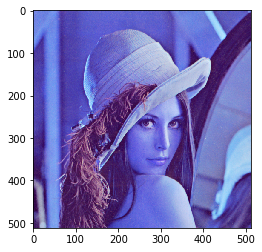

In [4]:
# matplotlibで画像を出力するばあいはimshowを使用
plt.imshow(img)

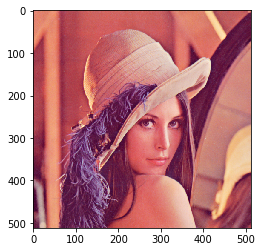

In [5]:
# 上記なままではBGRの順番で読み込む(色空間については後述)のでRGBへ変換します
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# 数値データで見てみます。カラーなので[red,green,blue]の色が0~255で格納されています。
img[0][0]

array([226, 137, 125], dtype=uint8)

カラーの画像分類チュートリアルによく使用されるCIFAR-10データセットなども、上記のように数値で表現された画像から特徴を学習させていきます。
<img src="../data/cifar10.png">

## 表色系と色空間

色を心理的な観点から**色相(Hue)**、**明度(Saturation)**、**彩度(Value)**の三属性で表す方法をマンセル表色系と呼びます。

+ 色相
    + 色の違いを示す属性
+ 明度
    + 各色相の明るさを表す属性
+ 彩度
    + 彩度は色の鮮やかさを示す属性
    
<img src="../data/muncell_colormap.png">

一つの円の円周上で5等分するように配置します。色はR(赤), Y(黄), G(緑), B(青), P(紫)。

## RGB表色

CIE（国際照明委員会）が定める表色系。RGB表色系原色をR（赤、700nm）、G（緑、546.1nm）、B（青、435.8nm）とする表色系を、CIEのRGB表色系と呼んでいます。  

これらRGB表色系をベースとして画像処理を行っていきます。


## 画素ごとの濃淡変換
濃淡の変換は単純な処理ではありますが、画像の「**見栄え**」を変えたりするためなどに、使用される画像処理になります。  

酒直関数の画素値に対して、どうやって対応づけるかを指定することを階調変換といい、それをグラフで表したものを**トーンカーブ**と呼んでいます。

## トーンカーブ
### ヒストグラム
画像のコントラストを上げたい時、まずは画像のヒストグラムを調べて分布を見ます。

In [8]:
img[:,:,0] #R(赤)の画素値

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

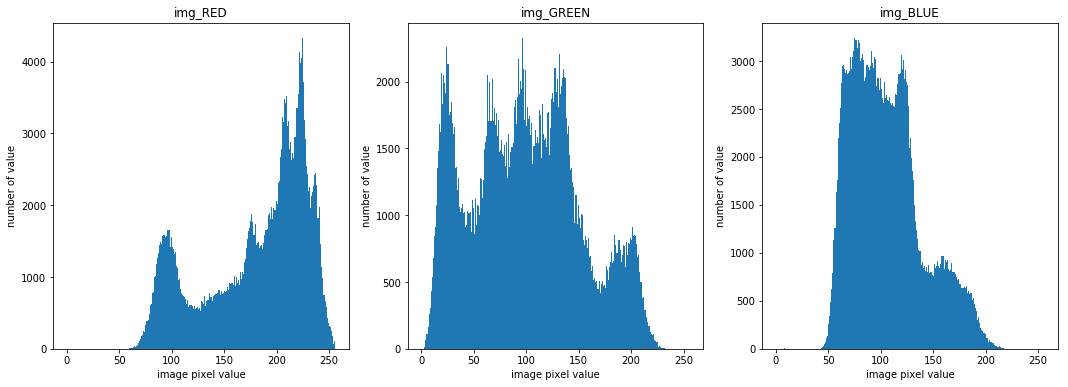

In [9]:
labels = ["RED", "GREEN", "BLUE"]
fig, ax = plt.subplots(1, 3, figsize=(18,6))
for i, rgb in enumerate(labels):
    img_rgb = img[:,:,i]
    ax[i].hist(img_rgb.ravel(),256,[0,256]);
    ax[i].set_title("img_{}".format(rgb))
    ax[i].set_xlabel("image pixel value")
    ax[i].set_ylabel("number of value")
plt.show()

## ヒストグラム平坦化
偏りが集中している場合はその画素をできるだけ広げて均等に分布することで、明るさの違う画像でもトーンカーブの結果を等しくすることができます。

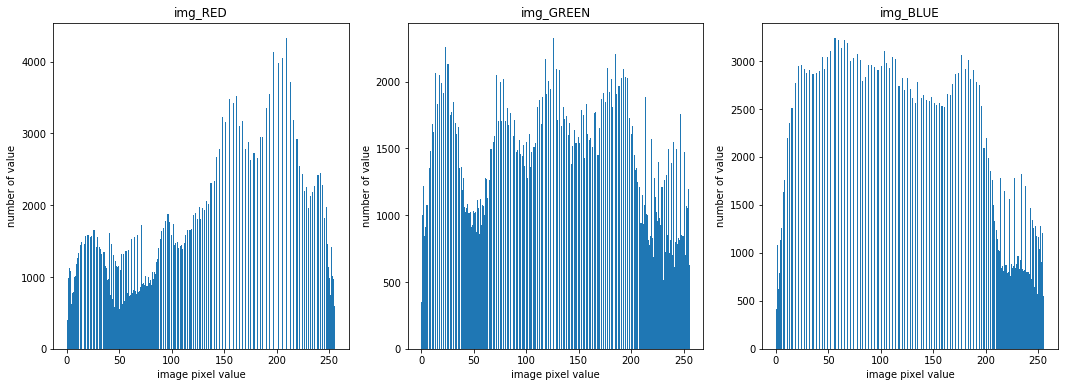

In [25]:
# 集中していた山がなだらかになります
labels = ["RED", "GREEN", "BLUE"]
fig, ax = plt.subplots(1, 3, figsize=(18,6))
img_rgb = []
for i, rgb in enumerate(labels):
    # ヒストグラムを平坦化する
    equ = cv2.equalizeHist(img[:,:,i])
    
    img_rgb.append(equ)
    ax[i].hist(equ.ravel(),256,[0,256]);
    ax[i].set_title("img_{}".format(rgb))
    ax[i].set_xlabel("image pixel value")
    ax[i].set_ylabel("number of value")
plt.show()

In [27]:
img_hist = np.dstack((np.dstack((img_rgb[0], img_rgb[1])), img_rgb[2]))

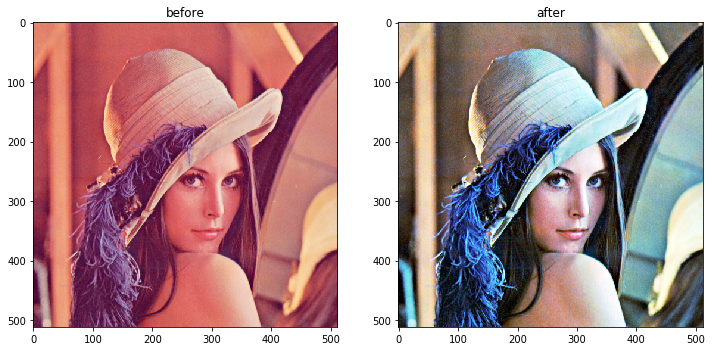

In [32]:
# 元画像とヒストグラム平坦化後の比較
labels = ["before", "after"]
fig, ax = plt.subplots(1, 2, figsize=(12,6))
for i, im in enumerate([img, img_hist]):
    ax[i].imshow(im)
    ax[i].set_title(labels[i])
plt.show()